허깅 페이스 무료

In [ ]:
import os
from openai import OpenAI
# from dotenv import load_dotenv
# load_dotenv()

client = OpenAI(
    base_url="https://router.huggingface.co/v1",
    api_key=os.environ["HF_TOKEN"],
)

completion = client.chat.completions.create(
    model="moonshotai/Kimi-K2-Instruct-0905",
    messages=[
        {
            "role": "user",
            "content": "Explain the theory of relativity in simple terms."
        }
    ],
)

print(completion.choices[0].message)

ChatCompletionMessage(content='Imagine you’re on a train that’s smoothly gliding forward. You drop a coin; it lands at your feet. To you, it falls straight down. To someone standing on the platform, the coin traces a curved path because the train is moving. Who’s “right”? Both. The way you describe motion depends on how you’re moving.\n\nEinstein’s theory of relativity is just that idea—pushed to its logical extremes:\n\n1. Special Relativity (1905)\n   - No experiment you do inside the train can tell you how fast the train is going unless you look outside. In other words, the laws of physics are the same for every “non-accelerating” observer.\n   - Light in empty space always zips away from you at the same speed, about 300,000 km/s, no matter how fast you chase it.\n   - Those two innocent statements force weird but confirmed consequences:\n     – Time stretches: a moving clock ticks slower than a stationary one.\n     – Lengths shrink: a moving ruler is shorter along the direction of

In [ ]:
import os
from huggingface_hub import InferenceClient
from PIL import Image

client = InferenceClient(
    provider="together",
    api_key=os.environ["HF_TOKEN"],
)

# output is a PIL.Image object
image = client.text_to_image(
    "A cute alien creature in a spaceship",
    model="black-forest-labs/FLUX.1-dev",
)

print(type(image))
print(image)

image.show()

HfHubHTTPError: 402 Client Error: Payment Required for url: https://router.huggingface.co/together/v1/images/generations (Request ID: Root=1-6941f8c6-154c911e442f946a390cef8e;314d24a9-8194-42bb-be4f-4822bb3bce8d)

You have reached the free monthly usage limit for together. Subscribe to PRO to get 20x more included usage, or add pre-paid credits to your account.

허깅 페이스  
1. agree and access 버튼 누르고
2. 세팅 -> Gated Repos Status
3. 터미널에서 로그인
            pip install huggingface_hub
    - CLI : 터미널 huggingface-cli login --> 토큰입력
    - 코드상에서 : from huggingface_hub import login
                 login(token='hf-token')

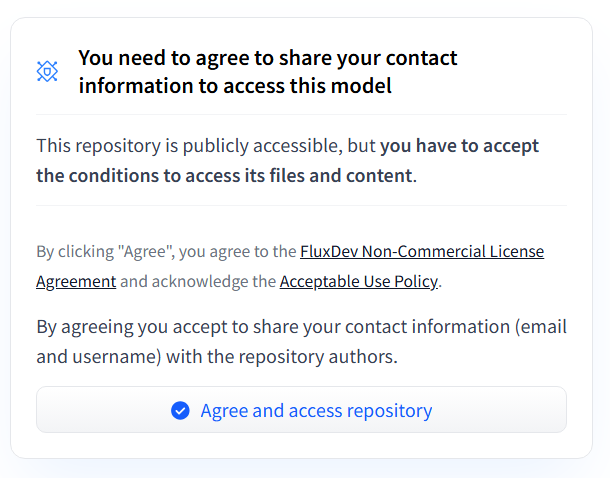

In [ ]:
%pip uninstall -y huggingface_hub diffusers transformers accelerate

In [ ]:
%pip install \
  huggingface_hub==0.23.4 \
  diffusers==0.30.3 \
  transformers==4.44.2 \
  accelerate==0.34.2

In [ ]:
import os
from huggingface_hub import login
print(f"{os.getenv('HF_TOKEN')[:5]}...")

In [ ]:
%pip install diffusers

In [ ]:
# 해당모델에 대해서 access 신청을 하고( 바로 승인 또는 몇시간 또는 며칠뒤에 승인이되는 경우가 있음)
# 허깅페이스에 로그인(브라우져 로그인 X)
# pip install huggingface_hub
    # CLI  : 터미널   huggingface-cli login --> 토큰입력
    # 코드상에서 : 
    # from huggingface_hub import login
    # login(token='hf-token')

import torch
import os
from diffusers import FluxPipeline
# runpod 에서 환경변수 등록을하면 로그인이 필요없다
# from huggingface_hub import login  
# login(token=os.getenv('HF_TOKEN'))

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)
pipe.to('cuda')

prompt = '''Please create a cosmetic advertisement image.
The subject is a foundation advertisement cover designed for women in their 20s to 30s, featuring a user applying or wearing foundation.'''
image = pipe(
    prompt,
    height=1024,
    width=1024,
    guidance_scale=3.5,
    num_inference_steps=50,
    max_sequence_length=512,
    generator=torch.Generator("cuda").manual_seed(0)
).images[0]
image.save("skin02.png")